#import the libraries

In [5]:
#importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load the Housing.csv file
file_path = '/content/Housing.csv'

# Read the CSV file using pandas
data=pd.read_csv(file_path, encoding='ascii')

#General insights


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [8]:
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [9]:
data.shape[:2]

(2930, 82)

In [10]:
data.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


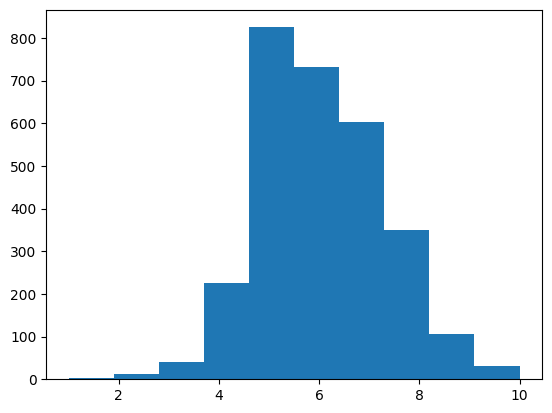

In [11]:
plt.hist(data['Overall Qual'])
plt.show()


In [12]:
data['Lot Area'].median()


9436.5

In [13]:
data.tail(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


In [14]:

data['Overall Qual'].value_counts()


Overall Qual
5     825
6     732
7     602
8     350
4     226
9     107
3      40
10     31
2      13
1       4
Name: count, dtype: int64

# Drop nan value

In [15]:
data = data.drop(['Alley','Fireplace Qu','Pool QC','Fence','Misc Feature','Order','PID'], axis = 1)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 903 entries, 0 to 2929
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      903 non-null    int64  
 1   MS Zoning        903 non-null    object 
 2   Lot Frontage     903 non-null    float64
 3   Lot Area         903 non-null    int64  
 4   Street           903 non-null    object 
 5   Lot Shape        903 non-null    object 
 6   Land Contour     903 non-null    object 
 7   Utilities        903 non-null    object 
 8   Lot Config       903 non-null    object 
 9   Land Slope       903 non-null    object 
 10  Neighborhood     903 non-null    object 
 11  Condition 1      903 non-null    object 
 12  Condition 2      903 non-null    object 
 13  Bldg Type        903 non-null    object 
 14  House Style      903 non-null    object 
 15  Overall Qual     903 non-null    int64  
 16  Overall Cond     903 non-null    int64  
 17  Year Built       903

In [16]:
data.head(2)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000


In [17]:
data.tail(2)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2915,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,5,2006,WD,Normal,140000
2929,60,RL,74.0,9627,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,11,2006,WD,Normal,188000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 903 entries, 0 to 2929
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      903 non-null    int64  
 1   MS Zoning        903 non-null    object 
 2   Lot Frontage     903 non-null    float64
 3   Lot Area         903 non-null    int64  
 4   Street           903 non-null    object 
 5   Lot Shape        903 non-null    object 
 6   Land Contour     903 non-null    object 
 7   Utilities        903 non-null    object 
 8   Lot Config       903 non-null    object 
 9   Land Slope       903 non-null    object 
 10  Neighborhood     903 non-null    object 
 11  Condition 1      903 non-null    object 
 12  Condition 2      903 non-null    object 
 13  Bldg Type        903 non-null    object 
 14  House Style      903 non-null    object 
 15  Overall Qual     903 non-null    int64  
 16  Overall Cond     903 non-null    int64  
 17  Year Built       903

In [19]:
# Split the data into categorical and numerical datasets
categorical_data = data.select_dtypes(include=['object'])
numerical_data = data.select_dtypes(exclude=['object'])
categorical_data.head(5)

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
15,RL,Pave,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,...,SBrkr,Ex,Mod,BuiltIn,Fin,TA,TA,Y,WD,Normal
17,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,...,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,New,Partial


In [20]:
categorical_data.tail(2)

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
2915,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2929,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


In [21]:
numerical_data.head(2)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000


In [22]:
numerical_data.tail(2)


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
2915,20,80.0,13384,5,5,1969,1979,194.0,119.0,344.0,...,160,0,0,0,0,0,0,5,2006,140000
2929,60,74.0,9627,7,5,1993,1994,94.0,758.0,0.0,...,190,48,0,0,0,0,0,11,2006,188000


Process numerical dataset

In [23]:
# prompt: Using pearson correlation features selection for numerical data set

# Calculate the Pearson correlation matrix
corr_matrix = numerical_data.corr()

# Identify the features with high correlation (above 0.75)
correlated_features = corr_matrix[corr_matrix['SalePrice'] > 0.75].index

# Drop the correlated features from the numerical dataset
numerical_data = numerical_data.drop(correlated_features, axis=1)

#Add the SalePrice column again
numerical_data = pd.concat([numerical_data, data['SalePrice']], axis=1)

In [24]:
numerical_data.head(5)

,MS SubClass,Lot Frontage,Lot Area,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,20,141.0,31770,5,1960,1960,112.0,639.0,0.0,441.0,...,210,62,0,0,0,0,0,5,2010,215000
2,20,81.0,14267,6,1958,1958,108.0,923.0,0.0,406.0,...,393,36,0,0,0,0,12500,6,2010,172000
5,60,78.0,9978,6,1998,1998,20.0,602.0,0.0,324.0,...,360,36,0,0,0,0,0,6,2010,195500
15,60,47.0,53504,5,2003,2003,603.0,1416.0,0.0,234.0,...,503,36,0,0,210,0,0,6,2010,538000
17,20,88.0,11394,2,2010,2010,350.0,1445.0,0.0,411.0,...,113,0,0,0,0,0,0,6,2010,394432


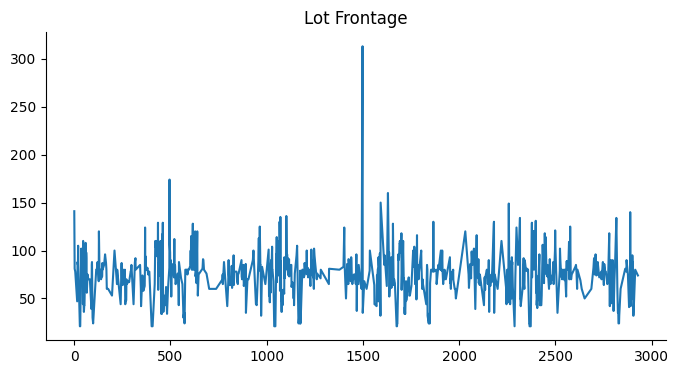

In [25]:
from matplotlib import pyplot as plt
data['Lot Frontage'].plot(kind='line', figsize=(8, 4), title='Lot Frontage')
plt.gca().spines[['top', 'right']].set_visible(False)

In [26]:
import pandas as pd
from scipy.stats import f_oneway
from tqdm import tqdm

tqdm.pandas()


# Split the data into categorical and numerical datasets
categorical_data = data.select_dtypes(include=['object'])
numerical_data = data.select_dtypes(exclude=['object'])

# Perform ANOVA correlation coefficient feature selection for categorical data
anova_results = {}
for column in tqdm(categorical_data.columns):
    unique_values = categorical_data[column].unique()
    if len(unique_values) > 1:  # Ensure there are at least two unique values
        groups = [data[data[column] == value]['SalePrice'].values for value in unique_values]
        anova_results[column] = f_oneway(*groups)[1]  # p-value

# Filter out the strongly associated categorical features (p-value < 0.05)
strong_association = {k: v for k, v in anova_results.items() if v < 0.05}

# Keep only strongly associated categorical features
strongly_associated_categorical_data = categorical_data[list(strong_association.keys())]

# Output the strongly associated categorical features
print('Strongly associated categorical features with Sale Price:')
print(list(strong_association.keys()))

100%|██████████| 38/38 [00:00<00:00, 282.52it/s]

Strongly associated categorical features with Sale Price:
['MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Paved Drive', 'Sale Type', 'Sale Condition']


In [27]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 903 entries, 0 to 2929
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       903 non-null    object
 1   Street          903 non-null    object
 2   Lot Shape       903 non-null    object
 3   Land Contour    903 non-null    object
 4   Utilities       903 non-null    object
 5   Lot Config      903 non-null    object
 6   Land Slope      903 non-null    object
 7   Neighborhood    903 non-null    object
 8   Condition 1     903 non-null    object
 9   Condition 2     903 non-null    object
 10  Bldg Type       903 non-null    object
 11  House Style     903 non-null    object
 12  Roof Style      903 non-null    object
 13  Roof Matl       903 non-null    object
 14  Exterior 1st    903 non-null    object
 15  Exterior 2nd    903 non-null    object
 16  Mas Vnr Type    903 non-null    object
 17  Exter Qual      903 non-null    object
 18  Exter Cond    

In [28]:
onehot_data = pd.get_dummies(categorical_data, columns=categorical_data.columns)

In [29]:
onehot_data

,MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,...,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,False,False,True,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,True,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
5,False,False,True,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
15,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
17,False,False,True,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,False,False,False,True,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
2905,False,False,False,True,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
2906,False,False,False,True,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
2915,False,False,True,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False


In [30]:
combined_data = pd.concat([onehot_data, numerical_data], axis=1)
combined_data

,MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,False,False,True,False,False,True,True,False,False,False,...,210,62,0,0,0,0,0,5,2010,215000
2,False,False,True,False,False,True,True,False,False,False,...,393,36,0,0,0,0,12500,6,2010,172000
5,False,False,True,False,False,True,True,False,False,False,...,360,36,0,0,0,0,0,6,2010,195500
15,False,False,True,False,False,True,False,True,False,False,...,503,36,0,0,210,0,0,6,2010,538000
17,False,False,True,False,False,True,False,False,False,True,...,113,0,0,0,0,0,0,6,2010,394432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,False,False,False,True,False,True,False,False,False,True,...,0,48,0,0,0,0,0,11,2006,215000
2905,False,False,False,True,False,True,False,False,False,True,...,0,125,0,0,0,0,0,5,2006,164000
2906,False,False,False,True,False,True,False,False,False,True,...,0,199,0,0,0,0,0,3,2006,153500
2915,False,False,True,False,False,True,False,False,False,True,...,160,0,0,0,0,0,0,5,2006,140000


In [31]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define inputs and target variable
X = combined_data.drop('SalePrice', axis=1)
y = combined_data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict the SalePrice on the testing data
y_pred = xgb_model.predict(X_test)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

# Output the R-squared value
print('R-squared value:', r2)




R-squared value: 0.8947991501659514


In [32]:
pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred, 'Residuals': y_pred-y_test})


,Actual Price,Predicted Price,Residuals
241,308030,216498.703125,-91531.296875
1498,160000,317524.531250,157524.531250
623,187500,179948.562500,-7551.437500
818,323262,323822.468750,560.468750
91,362500,315065.656250,-47434.343750
...,...,...,...
2791,214000,200286.718750,-13713.281250
1453,230000,248887.015625,18887.015625
2775,214000,225503.640625,11503.640625
50,175500,159350.140625,-16149.859375


In [33]:
# 5 most features importance and its importance values

feature_importances = xgb_model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
feature_importances.sort_values('importance', ascending=False).head(5)


,feature,importance
200,Overall Qual,0.439607
222,Garage Cars,0.104054
215,Full Bath,0.054224
10,Land Contour_Bnk,0.046510
120,Bsmt Qual_Ex,0.045062


<Axes: title={'center': 'Distribution of Sale Prices'}, ylabel='Frequency'>

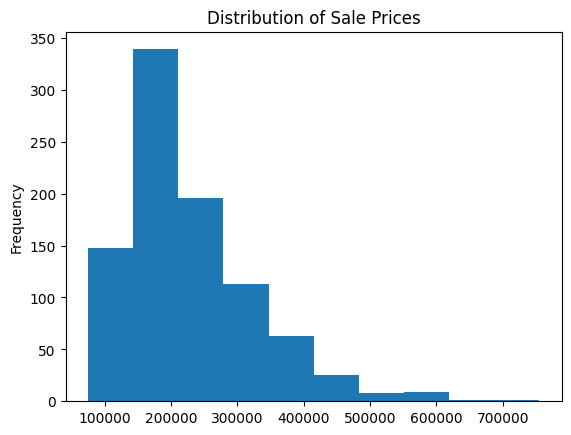

In [34]:
data['SalePrice'].plot(kind='hist', title='Distribution of Sale Prices')

In [35]:
combined_data['Overall Qual']

0       6
2       6
5       6
15      8
17      9
       ..
2904    7
2905    6
2906    6
2915    5
2929    7
Name: Overall Qual, Length: 903, dtype: int64

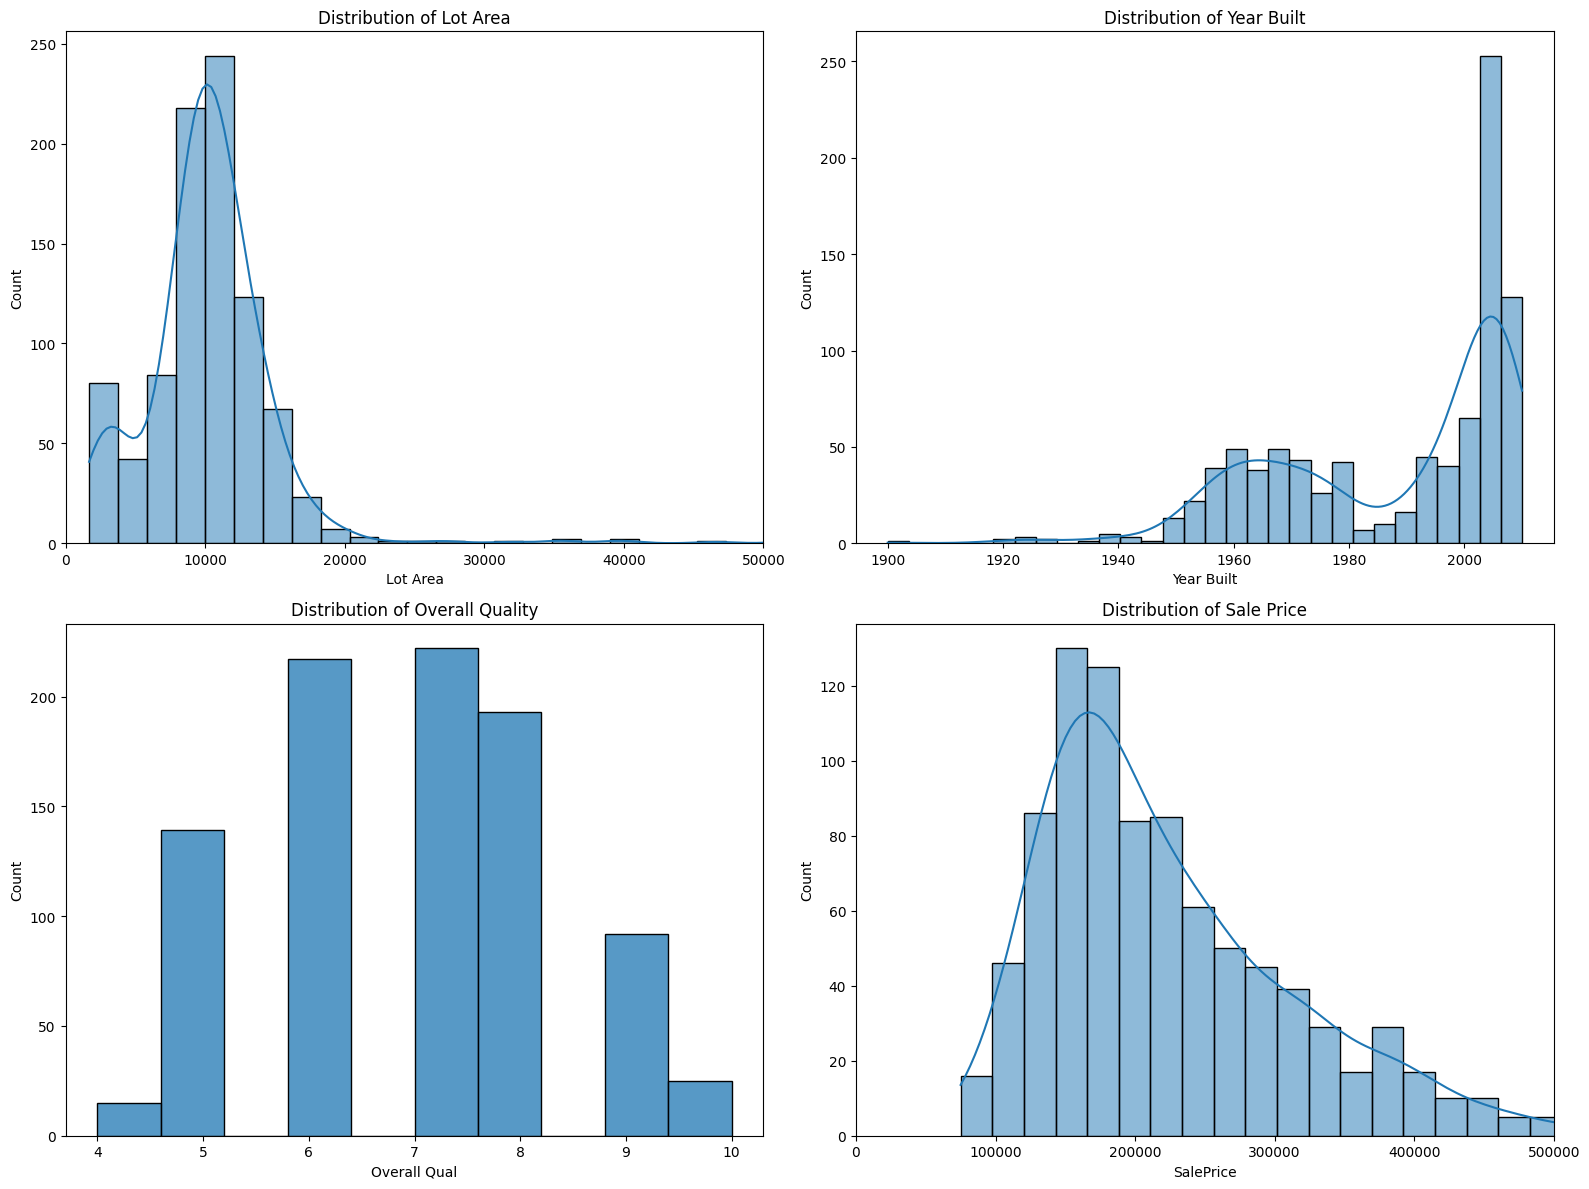

In [36]:
# Plotting distributions of a few numerical columns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
#Distribution of Lot Area
sns.histplot(data['Lot Area'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Lot Area')
axes[0, 0].set_xlim(0, 50000) # Limiting x-axis for better readability

#Distribution of Year Built
sns.histplot(data['Year Built'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Year Built')

#Distribution of Overall Quality
sns.histplot(data['Overall Qual'], bins=10, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Overall Quality')

#Distribution of Sale Price
sns.histplot(data['SalePrice'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Sale Price')
axes[1, 1].set_xlim(0, 500000)

plt.tight_layout()
plt.show()
